In [1]:
from smach_utils2 import *
import matplotlib.pyplot as plt
#arm = moveit_commander.MoveGroupCommander('arm')


In [2]:
arm = moveit_commander.MoveGroupCommander('arm')

[ WARN] [1711747195.575709531]: Link hand_l_finger_vacuum_frame has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1711747195.581022466]: Link head_l_stereo_camera_link has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1711747195.581066188]: Link head_r_stereo_camera_link has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1711747195.582385775]: Group state 'neutral' doesn't specify all group joints in group 'arm'. wrist_ft_sensor_frame_joint is missing.
[ WARN] [1711747195.582429744]: Group state 'go' doesn't specify all group joints in group 'arm'. wrist_ft_sensor_frame_joint is missing.
[ WARN] [1711747195.733609377, 135.505000000]: Kinematics solver doesn't suppor

In [3]:

arm.set_named_target('go')
arm.go()

True

In [6]:
head.set_joint_values([0.0,-0.65])
rospy.sleep(0.6)
rospy.sleep(0.6)
image= cv2.cvtColor(rgbd.get_image(), cv2.COLOR_RGB2BGR)
img_msg  = bridge.cv2_to_imgmsg(image)
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)
res      = classify_client(req)
debug_image=   cv2.cvtColor(bridge.imgmsg_to_cv2(res.debug_image.image_msgs[0]), cv2.COLOR_RGB2BGR)

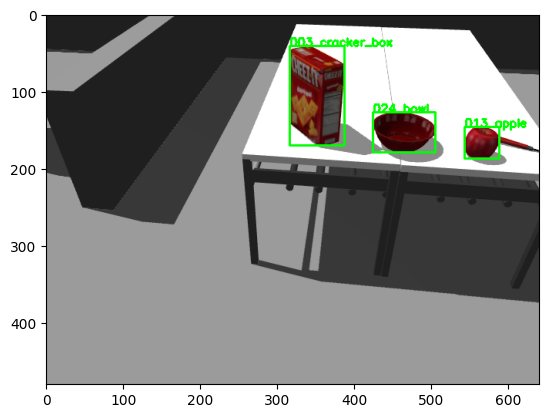

In [7]:

plt.imshow(debug_image)

In [8]:

for i in range(len(res.poses)):
    tf_man.getTF("head_rgbd_sensor_rgb_frame")
    #tf_man.pub_static_tf(pos=[res.poses[i].position.x ,res.poses[i].position.y,res.poses[i].position.z], rot=[0,0,0,1],ref="head_rgbd_sensor_rgb_frame",point_name=res.names[i].data[4:] )   
    tf_man.pub_static_tf(pos=[res.poses[i].position.x ,res.poses[i].position.y,res.poses[i].position.z], rot=[0,0,0,1],ref="head_rgbd_sensor_rgb_frame",point_name='apple' )   
    rospy.sleep(0.3)
    tf_man.change_ref_frame_tf(res.names[i].data[4:])



In [9]:
#omni_base.move_d_to(target_distance=0.78,target_link='apple')
pose,rot=tf_man.getTF(target_frame='hand_palm_link')
pose

[6.241177272734614, 3.7160886990520305, 0.6730236294227455]

In [10]:
target_object='apple'
trans,_=tf_man.getTF(target_object,ref_frame="base_link")
trans


[1.0212206474248777, -0.44649772528756504, 0.4394762376993564]

In [11]:
target_object='apple'
_,rot= tf_man.getTF("base_link",ref_frame='map')

original_rot=tf.transformations.euler_from_quaternion(rot)[2]
trans,_=tf_man.getTF(target_object,ref_frame="base_link")


trans , original_rot

([1.0227041683272318, -0.4423349859405832, 0.43947623769935606],
 1.6672013821423002)

In [12]:
_,rot= tf_man.getTF("base_link",ref_frame='map')
original_rot=tf.transformations.euler_from_quaternion(rot)[2]
target_object='apple'


succ = False
            
while not succ:
    
    _,rot= tf_man.getTF("base_link",ref_frame='map')
    trans,_=tf_man.getTF(target_object,ref_frame="base_link")

    trans
    eX, eY, eZ = trans
    
    eX+= -0.4
    eY+= -.06
    
    eT= tf.transformations.euler_from_quaternion(rot)[2] - original_rot #Original 
    print (eT)
    if eT > np.pi: eT=-2*np.pi+eT
    if eT < -np.pi: eT= 2*np.pi+eT
    rospy.loginfo("error: {:.2f}, {:.2f}, angle {:.2f}, target obj frame {}".format(eX, eY , eT,target_object))
    X, Y, Z = trans
    rospy.loginfo("Pose: {:.2f}, {:.2f}, angle {:.2f}, target obj frame {}".format(X, Y , eT,target_object))
    
    if abs(eX) <=0.05 :
        print ('here')
        eX = 0
    if abs(eY) <=0.05  :
        eY = 0
    if abs(eT   ) < 0.1:
        eT = 0
    succ =  eX == 0 and eY == 0 and eT==0

    
    omni_base.tiny_move( velX=0.2*+eX,velY=0.3*eY, velT=-eT,std_time=0.2, MAX_VEL=0.3) 


0.0
-0.0018671772656859709
-0.06455780872921446


[ WARN] [1711747336.010433247, 201.123000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 201.146000 according to authority unknown_publisher
[ WARN] [1711747336.015522635, 201.123000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 201.146000 according to authority /pose_integrator
[ WARN] [1711747336.015591225, 201.123000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 201.146000 according to authority /pose_integrator
[ WARN] [1711747336.015629170, 201.123000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 201.146000 according to authority /pose_integrator
[ WARN] [1711747336.015663594, 201.123000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 201.146000 according to authority /pose_integrator
[ WARN] [1711747336.015699838, 201.123000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

-0.0750890244351754
-0.08838148436035076
-0.095480341348128
-0.10152494540310908
-0.10342376280873133
-0.09535642171205483
-0.07493988939854246
-0.07372773437647595
-0.07548979147331702
-0.07625282668490008
-0.07641785150285774
-0.07715973052104874
-0.07718888872519636
-0.0768493514212496
-0.07797827281301606
-0.0797857685125718
-0.08134711189838217
-0.08223739565029908
-0.08411234618676033
-0.08635047231442305


[ WARN] [1711747345.399012063, 205.156000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 205.177000 according to authority unknown_publisher
[ WARN] [1711747345.399783391, 205.156000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 205.177000 according to authority /pose_integrator
[ WARN] [1711747345.399841523, 205.156000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 205.177000 according to authority /pose_integrator
[ WARN] [1711747345.399890474, 205.156000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 205.177000 according to authority /pose_integrator
[ WARN] [1711747345.399924668, 205.156000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 205.177000 according to authority /pose_integrator
[ WARN] [1711747345.399960795, 205.156000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

-0.08744021822212367
-0.08977336884415466
-0.0917102370099363
-0.09235764622776821
-0.0944722029100955
-0.09551729411173193
-0.09706428849604443
-0.0968837458145142
-0.09845298536496472


[ WARN] [1711747349.873897240, 207.091000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 207.110000 according to authority unknown_publisher
[ WARN] [1711747349.875473461, 207.091000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 207.110000 according to authority /pose_integrator
[ WARN] [1711747349.875550606, 207.091000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 207.110000 according to authority /pose_integrator
[ WARN] [1711747349.875613967, 207.091000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 207.110000 according to authority /pose_integrator
[ WARN] [1711747349.875655090, 207.091000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 207.110000 according to authority /pose_integrator
[ WARN] [1711747349.875697284, 207.091000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

-0.09982175486491118
-0.10196745903468107
-0.10292929710502818
-0.08716928071015095
-0.06802238555710693
-0.06760622977488584
-0.06724897947517383
-0.06725381029454036
-0.06759141876447305


[ WARN] [1711747354.001273581, 208.859000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 208.880000 according to authority unknown_publisher
[ WARN] [1711747354.006473476, 208.880000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 208.880000 according to authority /pose_integrator
[ WARN] [1711747354.006526979, 208.880000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 208.880000 according to authority /pose_integrator
[ WARN] [1711747354.006549548, 208.880000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 208.880000 according to authority /pose_integrator
[ WARN] [1711747354.006569214, 208.880000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 208.880000 according to authority /pose_integrator
[ WARN] [1711747354.006589312, 208.880000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

-0.06875392526223467
-0.0706024458820671
-0.07266661818073672
-0.07463997255976418
-0.07611698238868425
-0.0777566797597562


[ WARN] [1711747356.756429570, 210.049000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 210.077000 according to authority unknown_publisher
[ WARN] [1711747356.758449249, 210.049000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 210.077000 according to authority /pose_integrator
[ WARN] [1711747356.758515299, 210.049000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 210.077000 according to authority /pose_integrator
[ WARN] [1711747356.758558767, 210.049000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 210.077000 according to authority /pose_integrator
[ WARN] [1711747356.758600043, 210.049000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 210.077000 according to authority /pose_integrator
[ WARN] [1711747356.758640226, 210.049000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

-0.07908218962045699
-0.07996547004844579
-0.08040996192268168
-0.0813185589533425
-0.081885240357916
-0.08218101065291372
-0.08244102571367895
-0.08266836488902896
-0.0829045793618981
-0.08311545339081738
-0.08334991210425136
-0.08346698480952197
here


[ WARN] [1711747362.910235039, 212.939000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 212.954000 according to authority unknown_publisher
[ WARN] [1711747362.912059579, 212.939000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 212.954000 according to authority /pose_integrator
[ WARN] [1711747362.912115229, 212.939000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 212.954000 according to authority /pose_integrator
[ WARN] [1711747362.912150056, 212.939000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 212.954000 according to authority /pose_integrator
[ WARN] [1711747362.912182702, 212.939000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 212.954000 according to authority /pose_integrator
[ WARN] [1711747362.912214447, 212.939000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

In [ ]:
res.names

In [13]:
head.set_joint_values([0.0,0.0])
#clear_octo_client()

hand_cam= HAND_RGB()


In [14]:
#clear_octo_client()

pickup_pose=[min(trans[2],0.66),-1.2,0.0,-1.9, 0.0, 0.0]
#pickup_pose=[0.65,-1.2,0.0,-1.9, 0.0, 0.0]
succ= arm.go(pickup_pose)
gripper.open()


[ WARN] [1711747462.728274477, 258.845000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 258.878000 according to authority unknown_publisher
[ WARN] [1711747462.728924764, 258.845000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 258.878000 according to authority /pose_integrator
[ WARN] [1711747462.728991410, 258.845000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 258.878000 according to authority /pose_integrator
[ WARN] [1711747462.729037188, 258.845000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 258.878000 according to authority /pose_integrator
[ WARN] [1711747462.729074791, 258.845000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 258.878000 according to authority /pose_integrator
[ WARN] [1711747462.729116297, 258.845000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

[ WARN] [1711747492.276609410, 271.424000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 271.466000 according to authority /pose_integrator
[ WARN] [1711747492.276680918, 271.424000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 271.466000 according to authority /pose_integrator
[ WARN] [1711747492.276733721, 271.424000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 271.466000 according to authority /pose_integrator
[ WARN] [1711747492.276782111, 271.424000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 271.466000 according to authority /pose_integrator
[ WARN] [1711747492.276828644, 271.424000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 271.466000 according to authority /pose_integrator
[ WARN] [1711747492.276874284, 271.424000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame od

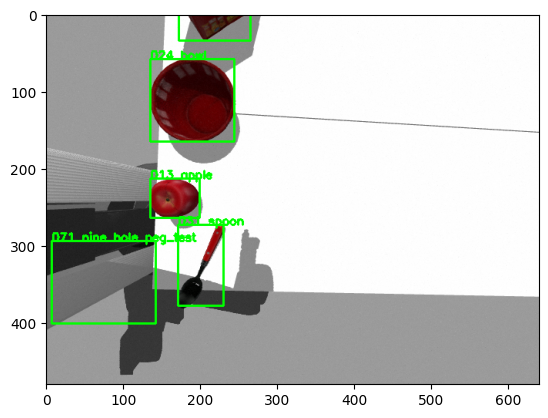

[ WARN] [1711747494.633155678, 272.501000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 272.521000 according to authority unknown_publisher
[ WARN] [1711747494.634661629, 272.501000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 272.521000 according to authority /pose_integrator
[ WARN] [1711747494.634747020, 272.501000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 272.521000 according to authority /pose_integrator
[ WARN] [1711747494.634817015, 272.501000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 272.521000 according to authority /pose_integrator
[ WARN] [1711747494.634882114, 272.501000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 272.521000 according to authority /pose_integrator
[ WARN] [1711747494.634962137, 272.501000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

In [15]:

image= cv2.cvtColor(hand_cam.get_image(), cv2.COLOR_RGB2BGR)
img_msg  = bridge.cv2_to_imgmsg(image)
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)
res      = classify_client(req)
debug_image=   cv2.cvtColor(bridge.imgmsg_to_cv2(res.debug_image.image_msgs[0]), cv2.COLOR_RGB2BGR)

plt.imshow(debug_image)

## [(323, 266), (280, 215)]  at pkcp pose


In [16]:
abs(eX) > 0.05 or abs(eY) > 0.05

False

In [18]:
if target_object=='pear':common_misid='tennis_ball'
if target_object=='apple':common_misid='orange'

In [19]:
eX,eY= 0.3,0.3 
first =True
while abs(eX) > 0.08 or abs(eY) > 0.08:
    image= cv2.cvtColor(hand_cam.get_image(), cv2.COLOR_RGB2BGR)
    img_msg  = bridge.cv2_to_imgmsg(image)
    req      = classify_client.request_class()
    req.in_.image_msgs.append(img_msg)
    res      = classify_client(req)


    for i in range(len(res.names)):
        if res.names[i].data[4:]== target_object or res.names[i].data[4:]== common_misid :#'013_apple' or res.names[i].data== '017_orange':
            bbM=res.pt_min.data[2*i:2*i+2]
            bbm=res.pt_max.data[2*i:2*i+2]
            bbx=[bbM,bbm]
            if first:
                if res.names[i].data[4:]== common_misid:print(common_misid) #talk (f'{target_object} looks like a {common_misid} from my hands perspective')            
                if res.names[i].data[4:]== common_misid:print (common_misid)#talk (f'{target_object} looks like a {common_misid} from my hands perspective')                
    
    if 'bbx' not in locals():print ('not yoloed')
    else:
        eY=(bbx[1][1]-215)/215    #experience value
        print(f'bbx {bbx}')
        #eX=(bbx[0][0]-323)/323
        eY=(bbx[1][1]-239)/239
        eX=(bbx[0][0]-312)/312
        #eY=(bbx[1][1]-215)/215    #experience value

        print(f'error relative to gripper cam ex={eX} ey={eY}')
        omni_base.tiny_move(velX=0.15*eX, velY=0.15*-eY, MAX_VEL=0.05) 

        print(f'error relative to gripper cam ex={eX} ey={eY}:::::: Error within tolerance')

bbx [(199, 277), (135, 225)]
error relative to gripper cam ex=-0.36217948717948717 ey=-0.058577405857740586
error relative to gripper cam ex=-0.36217948717948717 ey=-0.058577405857740586:::::: Error within tolerance
bbx [(213, 284), (150, 227)]
error relative to gripper cam ex=-0.3173076923076923 ey=-0.0502092050209205
error relative to gripper cam ex=-0.3173076923076923 ey=-0.0502092050209205:::::: Error within tolerance
bbx [(226, 288), (166, 230)]
error relative to gripper cam ex=-0.27564102564102566 ey=-0.03765690376569038
error relative to gripper cam ex=-0.27564102564102566 ey=-0.03765690376569038:::::: Error within tolerance
bbx [(243, 285), (186, 232)]
error relative to gripper cam ex=-0.22115384615384615 ey=-0.029288702928870293
error relative to gripper cam ex=-0.22115384615384615 ey=-0.029288702928870293:::::: Error within tolerance
bbx [(252, 288), (197, 234)]
error relative to gripper cam ex=-0.19230769230769232 ey=-0.02092050209205021
error relative to gripper cam ex=-0.1

[ WARN] [1711747526.651083926, 284.952000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 284.985000 according to authority /pose_integrator
[ WARN] [1711747526.651156470, 284.952000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 284.985000 according to authority /pose_integrator
[ WARN] [1711747526.651193919, 284.952000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 284.985000 according to authority /pose_integrator
[ WARN] [1711747526.651225701, 284.952000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 284.985000 according to authority /pose_integrator
[ WARN] [1711747526.651260079, 284.952000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 284.985000 according to authority /pose_integrator
[ WARN] [1711747526.651290539, 284.952000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame od

error relative to gripper cam ex=-0.16346153846153846 ey=-0.016736401673640166:::::: Error within tolerance
bbx [(269, 285), (217, 237)]
error relative to gripper cam ex=-0.13782051282051283 ey=-0.008368200836820083


[ WARN] [1711747528.411879503, 285.738000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 285.759000 according to authority unknown_publisher
[ WARN] [1711747528.415811025, 285.738000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 285.759000 according to authority /pose_integrator
[ WARN] [1711747528.415890719, 285.738000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 285.759000 according to authority /pose_integrator
[ WARN] [1711747528.415935467, 285.738000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 285.759000 according to authority /pose_integrator
[ WARN] [1711747528.415975226, 285.738000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 285.759000 according to authority /pose_integrator
[ WARN] [1711747528.416025074, 285.738000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

error relative to gripper cam ex=-0.13782051282051283 ey=-0.008368200836820083:::::: Error within tolerance
bbx [(275, 286), (225, 238)]
error relative to gripper cam ex=-0.11858974358974358 ey=-0.0041841004184100415
error relative to gripper cam ex=-0.11858974358974358 ey=-0.0041841004184100415:::::: Error within tolerance
bbx [(281, 287), (231, 238)]
error relative to gripper cam ex=-0.09935897435897435 ey=-0.0041841004184100415


[ WARN] [1711747530.927692347, 286.817000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 286.844000 according to authority unknown_publisher
[ WARN] [1711747530.933549132, 286.817000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 286.844000 according to authority /pose_integrator
[ WARN] [1711747530.933632816, 286.817000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 286.844000 according to authority /pose_integrator
[ WARN] [1711747530.933682963, 286.817000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 286.844000 according to authority /pose_integrator
[ WARN] [1711747530.933732335, 286.817000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 286.844000 according to authority /pose_integrator
[ WARN] [1711747530.933781481, 286.817000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

error relative to gripper cam ex=-0.09935897435897435 ey=-0.0041841004184100415:::::: Error within tolerance
bbx [(285, 287), (236, 238)]
error relative to gripper cam ex=-0.08653846153846154 ey=-0.0041841004184100415
error relative to gripper cam ex=-0.08653846153846154 ey=-0.0041841004184100415:::::: Error within tolerance
bbx [(289, 286), (240, 238)]
error relative to gripper cam ex=-0.07371794871794872 ey=-0.0041841004184100415
error relative to gripper cam ex=-0.07371794871794872 ey=-0.0041841004184100415:::::: Error within tolerance


[ WARN] [1711747545.033902574, 292.819000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 292.834000 according to authority unknown_publisher
[ WARN] [1711747545.035374455, 292.819000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 292.834000 according to authority /pose_integrator
[ WARN] [1711747545.035446462, 292.819000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 292.834000 according to authority /pose_integrator
[ WARN] [1711747545.035518695, 292.819000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 292.834000 according to authority /pose_integrator
[ WARN] [1711747545.035557047, 292.819000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 292.834000 according to authority /pose_integrator
[ WARN] [1711747545.035601667, 292.819000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

In [12]:
talk ('test')

True

In [20]:
clear_octo_client()
pose,_=tf_man.getTF(target_frame='hand_palm_link',ref_frame='apple')
av=arm.get_current_joint_values()
print (av,'av')
av=arm.get_current_joint_values()
av[0]+=0.07-pose[2]
#av[0]+= -0.17###LAB
#av[0]+= -0.35###GAZ
succ=arm.go(av)
rospy.sleep(0.5)
gripper.close(force=0.06)

[ WARN] [1711747573.405433697, 305.383000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 305.410000 according to authority unknown_publisher
[ WARN] [1711747573.405878841, 305.383000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 305.410000 according to authority /pose_integrator
[ WARN] [1711747573.405939622, 305.383000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 305.410000 according to authority /pose_integrator
[ WARN] [1711747573.405990700, 305.383000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 305.410000 according to authority /pose_integrator
[ WARN] [1711747573.406035103, 305.383000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 305.410000 according to authority /pose_integrator
[ WARN] [1711747573.406084231, 305.383000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

[0.4393853224720736, -1.203101715800293, 0.0005662540545881001, -1.9001213679322344, -6.511593829294782e-05, 0.0] av


[ WARN] [1711747592.333846401, 313.649000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 313.670000 according to authority /pose_integrator
[ WARN] [1711747592.333913084, 313.649000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 313.670000 according to authority /pose_integrator
[ WARN] [1711747592.333954026, 313.649000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 313.670000 according to authority /pose_integrator
[ WARN] [1711747592.333990706, 313.649000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 313.670000 according to authority /pose_integrator
[ WARN] [1711747592.334029497, 313.649000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 313.670000 according to authority /pose_integrator
[ WARN] [1711747592.334064588, 313.649000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame od

In [ ]:
av=arm.get_current_joint_values()
print (av,'av')
av[0]+= 0.15
succ=arm.go(av)
omni_base.tiny_move(velX=-0.3, std_time=4.0)
arm.set_named_target('go')
arm.go()
#tf_man.pub_static_tf(point_name='apple')

In [ ]:
pose,rot=tf_man.getTF(target_frame='hand_palm_link',ref_frame='apple')
pose[2]

In [ ]:
#clear_octo_client()

pickup_pose=[0.65,-1.2,0.0,-1.9, 0.0, 0.0]
succ= arm.go(pickup_pose)
gripper.open()


[ WARN] [1708639717.084610808]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 651.480000 according to authority /pose_integrator
[ WARN] [1708639717.084657344]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 651.480000 according to authority /pose_integrator
[ WARN] [1708639717.084692053]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 651.480000 according to authority /pose_integrator
[ WARN] [1708639717.084740851]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 651.480000 according to authority /pose_integrator
[ WARN] [1708639717.084789029]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 651.480000 according to authority /pose_integrator
[ WARN] [1708639717.084812912]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 651.480000 according to authority /pose_integrator
[ WARN] [1708639717.34504468

In [8]:
goal

timeout: 0.0
target: 
  data: "apple"

[ WARN] [1708639724.363636744]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 654.267000 according to authority /pose_integrator
[ WARN] [1708639724.363699148]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 654.267000 according to authority /pose_integrator
[ WARN] [1708639724.363755199]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 654.267000 according to authority /pose_integrator
[ WARN] [1708639724.363795801]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 654.267000 according to authority /pose_integrator
[ WARN] [1708639724.363831043]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 654.267000 according to authority /pose_integrator
[ WARN] [1708639724.363862831]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 654.267000 according to authority /pose_integrator
[ WARN] [1708639724.45798258

In [4]:
#### SEGMENT AND FLOOR

In [76]:
request= segmentation_server.request_class()

In [96]:
head.set_joint_values([0.0,-0.6])
rospy.sleep(0.6)
rospy.sleep(0.6)

In [97]:
request.height.data=0

In [98]:
res=segmentation_server.call(request)
succ=seg_res_tf(res)

4 found
object_0 found at [-1.57969511  1.21244311 -0.07274493]
Occupancy map at point object 0-> pixels  280 224 -1
reject point suggested ( for floor), most likely part of arena, occupied inflated map
object found at map coords.[-1.5796951055526733, 1.2124431133270264, -0.0727449283003807] 
object_1 found at [-1.67764568  1.11334276 -0.07302897]
Occupancy map at point object 1-> pixels  278 222 -1
reject point suggested ( for floor), most likely part of arena, occupied inflated map
object found at map coords.[-1.6776456832885742, 1.1133427619934082, -0.07302897423505783] 
object_2 found at [-2.53624058  0.4760533  -0.07136885]
Occupancy map at point object 2-> pixels  266 205 -1
reject point suggested ( for floor), most likely part of arena, occupied inflated map
object found at map coords.[-2.536240577697754, 0.47605329751968384, -0.07136885076761246] 
object_3 found at [-2.03758383e+00  1.59831834e+00 -3.25197179e-04]
Occupancy map at point object 3-> pixels  288 215 -1
reject poin

In [99]:
print (f'heights{res.heights.data}, widths {res.widths.data}')

heights(0.007835865020751953, 0.007859870791435242, 0.01168029010295868, 0.1518610268831253), widths (0.06147301197052002, 0.20250225067138672, 0.10209017992019653, 0.1621241569519043)


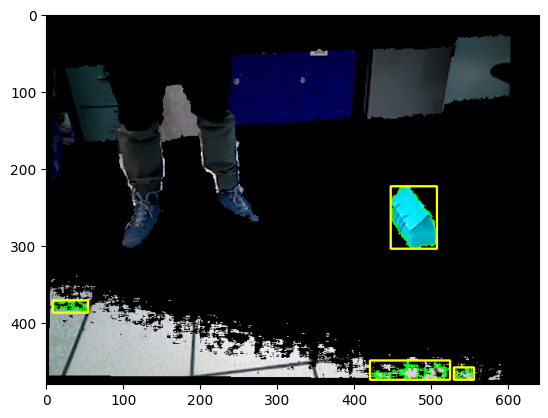

In [101]:
img=bridge.imgmsg_to_cv2(res.im_out.image_msgs[0])
plt.imshow(img)

In [102]:
tf_man.getTF('object_1')

[[-2.0411038398742676, 1.5976558923721313, -0.0007943566306494176],
 [0.0, 0.0, 0.8396366404654101, 0.5431485174314293]]

In [103]:
arm.get_current_joint_values()

[0.00014264772447688395,
 -0.021011528018885173,
 -1.5530013453436942,
 -1.7846586302849659,
 0.00046110822381617567,
 0.0]

In [55]:
grasp_floor_pose=[2.37,-1.46,-0.13,-1.41,0.0,0.0]

In [70]:
tf_man.getTF('object_2', 'base_link')

[[0.45006927447203227, -0.030403584708604714, 0.024665493518114076],
 [0.0, 0.0, -0.2670053736507724, 0.9636950401665514]]

# [[0.37157859106720137, 0.0193199118588111, 0.0012356116203591228],
Ideal  base link pose wrt object for grasping floor pose

In [111]:
gripper.open()

In [104]:
_,rot= tf_man.getTF("base_link",ref_frame='map')
original_rot=tf.transformations.euler_from_quaternion(rot)[2]
target_object='object_1'


succ = False
            
while not succ:
    
    _,rot= tf_man.getTF("base_link",ref_frame='map')
    trans,_=tf_man.getTF(target_object,ref_frame="base_link")

    trans
    eX, eY, eZ = trans
    
    eX+= -0.3
    eY+= -.1
    
    eT= tf.transformations.euler_from_quaternion(rot)[2] - original_rot #Original 
    print (eT)
    if eT > np.pi: eT=-2*np.pi+eT
    if eT < -np.pi: eT= 2*np.pi+eT
    rospy.loginfo("error: {:.2f}, {:.2f}, angle {:.2f}, target obj frame {}".format(eX, eY , eT,target_object))
    X, Y, Z = trans
    rospy.loginfo("Pose: {:.2f}, {:.2f}, angle {:.2f}, target obj frame {}".format(X, Y , eT,target_object))
    
    if abs(eX) <=0.05 :
        print ('here')
        eX = 0
    if abs(eY) <=0.05  :
        eY = 0
    if abs(eT   ) < 0.1:
        eT = 0
    succ =  eX == 0 and eY == 0 and eT==0

    
    omni_base.tiny_move( velX=0.2*+eX,velY=0.3*eY, velT=-eT,std_time=0.2, MAX_VEL=0.3) 


0.0
[INFO] [1709143953.828897]: error: 1.03, -0.54, angle 0.00, target obj frame object_1
[INFO] [1709143953.832555]: Pose: 1.33, -0.44, angle 0.00, target obj frame object_1
-0.057514580719546515
[INFO] [1709143954.038441]: error: 1.05, -0.46, angle -0.06, target obj frame object_1
[INFO] [1709143954.042712]: Pose: 1.35, -0.36, angle -0.06, target obj frame object_1
-0.20020686510178587
[INFO] [1709143954.253001]: error: 1.07, -0.26, angle -0.20, target obj frame object_1
[INFO] [1709143954.256504]: Pose: 1.37, -0.16, angle -0.20, target obj frame object_1
-0.27267203407605045
[INFO] [1709143954.465641]: error: 1.04, -0.15, angle -0.27, target obj frame object_1
[INFO] [1709143954.483488]: Pose: 1.34, -0.05, angle -0.27, target obj frame object_1
-0.2130500565850162
[INFO] [1709143954.691565]: error: 0.98, -0.21, angle -0.21, target obj frame object_1
[INFO] [1709143954.699037]: Pose: 1.28, -0.11, angle -0.21, target obj frame object_1
-0.15283027540201743
[INFO] [1709143954.904489]: 

-0.08203354003229135
[INFO] [1709143962.932872]: error: 0.17, -0.05, angle -0.08, target obj frame object_1
[INFO] [1709143962.939160]: Pose: 0.47, 0.05, angle -0.08, target obj frame object_1
-0.08307683257623433
[INFO] [1709143963.145452]: error: 0.16, -0.05, angle -0.08, target obj frame object_1
[INFO] [1709143963.152908]: Pose: 0.46, 0.05, angle -0.08, target obj frame object_1
-0.08303625972737105
[INFO] [1709143963.359139]: error: 0.16, -0.05, angle -0.08, target obj frame object_1
[INFO] [1709143963.362785]: Pose: 0.46, 0.05, angle -0.08, target obj frame object_1
-0.08416451354192844
[INFO] [1709143963.567227]: error: 0.15, -0.05, angle -0.08, target obj frame object_1
[INFO] [1709143963.574827]: Pose: 0.45, 0.05, angle -0.08, target obj frame object_1
-0.08433171158548802
[INFO] [1709143963.778816]: error: 0.14, -0.05, angle -0.08, target obj frame object_1
[INFO] [1709143963.782878]: Pose: 0.44, 0.05, angle -0.08, target obj frame object_1
-0.08321844573357895
[INFO] [170914

In [108]:
floor_pose=[0.0,-1.6,0.0,-1.41,0.0,0.0]
arm.set_joint_value_target(floor_pose)
arm.go()

True

In [106]:
head.set_named_target('neutral')

In [107]:
clear_octo_client()

In [112]:
gripper.close(0.04)

In [113]:
arm.set_named_target('neutral')
arm.go()

True

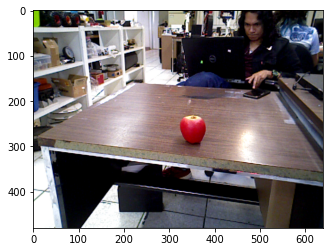

In [3]:
plt.imshow(rgbd.get_image())

In [6]:
tf_man.pub_static_tf(pos=[0,0,.5],point_name='prueba',ref='head_rgbd_sensor_link')